# Final Project, pt. 2
#### Alina Alcantara

**<font color=blue>Problem statement:</font>**
* Based on the results of the National Survey on Drug Use and Health 2015, I will use a logistic regression and random forests as classification methods to classify respondents in two groups: whether a person misuses pain killers or not, based on factors such as sex, marital status, work status, race, income, and misuse of other drugs. 

**<font color=blue>Hypothesis:</font>**
* H0 = Sex, marital status, work status, race, level of income and misuse of drugs have no effect on whether a person misuses pain relievers or not.
* H1 = Sex, marital status, work status, race, level of income and misuse of drugs have an effect on whether a person misuses pain relievers or not.

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import (brier_score_loss, precision_score, recall_score, f1_score, log_loss)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn import under_sampling, over_sampling
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
sns.set(style="whitegrid", font_scale=2.5)
%matplotlib inline
path2015 = r'/Users/alinaalcantara/ds-dc-20/datasets/drugs2015.tsv'
drugs2015 = pd.read_csv(path2015, sep='\t')

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2501) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
drugs2015.shape

(57146, 2666)

**<font color=blue>Variables:</font>**
* mrj: marijuana. 0 = Did not use in the past yr; 1=used within the past yr
* coc: cocaine
* crk: crack
* her: heroin
* pain_rel: misuse of pain relievers. 0= did not misuse pain relievers in the past yr; 1= misused pain relievers
* oxy: oxicontin misuse 
* tranq: tranquilizers misuse
* stim: stimulants misuse
* sed : sedative misuse
* illegal_drug: any illicit drug in past 12mos
* oxyyr: oxycontin - any past yr misuse 0=no 1=yes
* tramyr: tramadol - any past yr misuse 0=no 1=yes
* morphyr: morphine products - any past yr misuse 0=no 1=yes
* fentyr: fentanyl products - any past yr misuse 
* bupryr:Buprenorphine Products - any past yr misuse
* oxymyr:Oxymorphone Products - any past yr misuse
* demyr: Demerol products - any past yr use
* hydmyr:Hydromorphone Products - any past yr misuse
* methdyr: methadone products - any past yr use
* age: age of respondent 
* sex: sex of respondent 
* marital: marital status of respondent
* work: work status of respondent
* income: income level of respondent
* race: race of respondent

In [3]:
df2015 = drugs2015.filter(['QUESTID2','MRJYR','COCYR','CRKYR','HERYR','PNRNMYR','OXYCNNMYR','TRQNMYR','STMNMYR','SEDNMYR','ILLYR','OXCNNMYR2','TRAMPDPYMU','MORPPDPYMU','FENTPDPYMU','BUPRPDPYMU','OXYMPDPYMU','DEMEPDPYMU','HYDMPDPYMU','MTDNPDPYMU','CATAG7','IRSEX','IRMARITSTAT','IRWRKSTAT','INCOME','NEWRACE2'], axis=1)

In [4]:
cols = {'CATAG7':'age','QUESTID2':'id','MRJYR':'mrj','COCYR':'coc','CRKYR':'crk','HERYR':'her','PNRNMYR':'pain_rel','OXYCNNMYR':'oxy','TRQNMYR':'tranq','STMNMYR':'stim', 'SEDNMYR':'sed','ILLYR':'illegal_drug','OXCNNMYR2':'oxyyr','TRAMPDPYMU':'tramyr','MORPPDPYMU':'morphyr','FENTPDPYMU':'fentyr','BUPRPDPYMU':'bupryr','OXYMPDPYMU':'oxymyr','DEMEPDPYMU':'demyr','HYDMPDPYMU':'hydmyr','MTDNPDPYMU':'methdyr','IRSEX':'sex','IRMARITSTAT':'marital','IRWRKSTAT':'work','INCOME':'income','NEWRACE2':'race'}
df2015.rename(columns = cols, inplace=True)

In [5]:
df2015.set_index('id',inplace=True)

In [134]:
df2015.shape

(57146, 25)

In [6]:
age = {1:'12_13',2:'14_15',3:'16_17',4:'18_20',5:'21_25',6:'26_34',7:'35_and_over'}
marital = {1: 'married',2:'widowed',3:'Divorced',4:'never_married',99:'child'}
work = {1:'full_time',2:'part_time',3:'unemployed',4:'other',99:'child'}
income = {1:'<20,000',2:'21-49000',3:'50-74000',4:'75000>'}
race = {1:'white',2:'AfrAm',3:'NatAm',4:'NativeHI',5:'Asian',6:'>1race',7:'Hispanic'}
sex = {1:'male',2:'female'}
df2015 = df2015.replace({'age': age,'marital':marital,'work':work, 'income':income,'race':race,'sex':sex})

## <font color=blue>Exploratory Analysis</font>

In [8]:
df2015.head()

,mrj,coc,crk,her,pain_rel,oxy,tranq,stim,sed,illegal_drug,...,oxymyr,demyr,hydmyr,methdyr,age,sex,marital,work,income,race
id,,,,,,,,,,,,,,,,,,,,,
25095143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16_17,male,never_married,other,">20,000",white
13005143,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,35_and_over,male,Divorced,full_time,21-49000,Hispanic
67415143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26_34,female,never_married,other,">20,000",white
70925143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12_13,female,child,child,75000>,Hispanic
75235143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,21_25,female,married,other,">20,000",white


In [164]:
df2015.columns

Index([u'mrj', u'coc', u'crk', u'her', u'pain_rel', u'oxy', u'tranq', u'stim',
       u'sed', u'illegal_drug', u'oxyyr', u'tramyr', u'morphyr', u'fentyr',
       u'bupryr', u'oxymyr', u'demyr', u'hydmyr', u'methdyr', u'age', u'sex',
       u'marital', u'work', u'income', u'race'],
      dtype='object')

In [165]:
#pain killer misuse: 5.6% of the respondents said they misused a pain reliever in the past year
#this variable will be our outcome in further models
df2015.pain_rel.value_counts(normalize=True)

0    0.943793
1    0.056207
Name: pain_rel, dtype: float64

In [166]:
#sex: 53% of respondents are women. 
df2015.sex.value_counts(normalize=True)

female    0.532146
male      0.467854
Name: sex, dtype: float64

In [167]:
#age: 35% of respondents older than 35 years. 
df2015.age.value_counts(normalize=True)

35_and_over    0.348651
21_25          0.161814
26_34          0.158961
18_20          0.092850
14_15          0.082508
16_17          0.080111
12_13          0.075106
Name: age, dtype: float64

In [168]:
#marital status: 45% has never been married; 31% is married. 
df2015.marital.value_counts(normalize=True)

never_married    0.453173
married          0.316068
child            0.116176
Divorced         0.084975
widowed          0.029608
Name: marital, dtype: float64

In [169]:
#race: 58% of respondents are white; 18% is Hispanic. 
df2015.race.value_counts(normalize=True)

white       0.581843
Hispanic    0.186662
AfrAm       0.127375
Asian       0.044465
>1race      0.038778
NatAm       0.015644
NativeHI    0.005232
Name: race, dtype: float64

In [170]:
#Work status: 39% of respondents are employed full time
df2015.work.value_counts(normalize=True)

full_time     0.394113
other         0.273842
part_time     0.152522
child         0.116176
unemployed    0.063347
Name: work, dtype: float64

In [7]:
#Income:31% of respondents have an income greater than 75,000 usd
df2015.income.value_counts(normalize=True)

75000>      0.319690
21-49000    0.314405
<20,000     0.211231
50-74000    0.154674
Name: income, dtype: float64

In [172]:
#CROSSTAB RACE
#5% of white respondents has misused pain relievers in the last year.
#5% of hispanics has misused pain relievers in the last year.
#For all groups, but Asians, more that 5% have misused pain relievers.
(pd.crosstab(df2015.race, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
race,,
>1race,0.914260,0.085740
AfrAm,0.949581,0.050419
Asian,0.979142,0.020858
Hispanic,0.945627,0.054373
NatAm,0.936242,0.063758
NativeHI,0.949833,0.050167
white,0.941353,0.058647


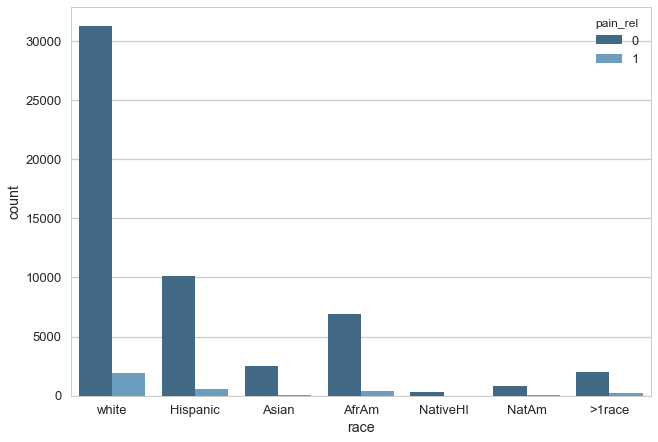

In [6]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
plt.rcParams["axes.labelsize"] = 20
sns.set_context("talk")
fig_race = sns.countplot(x="race", hue="pain_rel", data=df2015, palette="Blues_d");
fig = fig_race.get_figure()
fig.savefig('fig_race.png')

In [174]:
#CROSSTAB MARITAL STATUS
#Largest % (7%) of respondents that misused pain killers in the last year are among the "never married" group
#Followed by divorced/separated
(pd.crosstab(df2015.marital, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
marital,,
Divorced,0.937809,0.062191
child,0.976804,0.023196
married,0.962241,0.037759
never_married,0.923698,0.076302
widowed,0.942080,0.057920


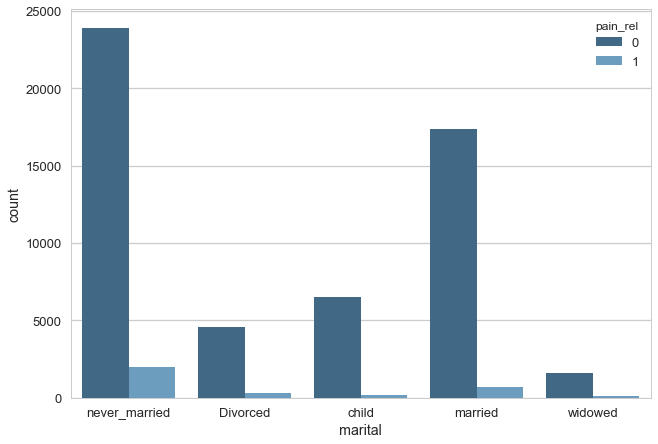

In [17]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
plt.rcParams["axes.labelsize"] = 20
sns.set_context("talk")
fig_marital = sns.countplot(x="marital", hue="pain_rel", data=df2015, palette="Blues_d");
fig = fig_marital.get_figure()
fig.savefig('fig_marital.png')

In [8]:
#CROSSTAB INCOME
#Largest % of respondents that misused pain killers in the last yr had an income <20,000usd
(pd.crosstab(df2015.income, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
income,,
21-49000,0.937608,0.062392
50-74000,0.949655,0.050345
75000>,0.954951,0.045049
"<20,000",0.931820,0.068180


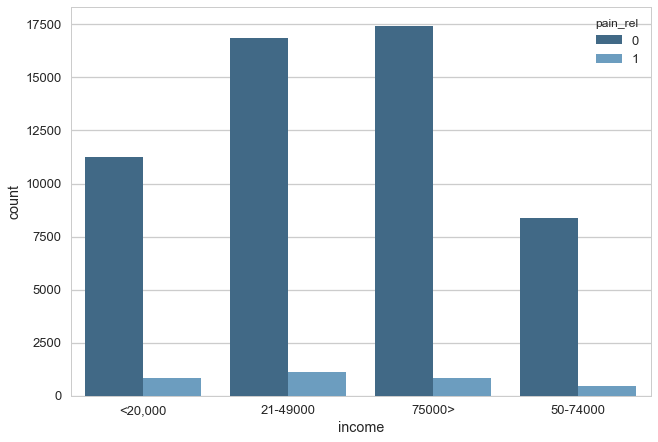

In [9]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
plt.rcParams["axes.labelsize"] = 20
sns.set_context("talk")
fig_income = sns.countplot(x="income", hue="pain_rel", data=df2015, palette="Blues_d");
fig = fig_income.get_figure()
fig.savefig('fig_income.png')

In [178]:
#CROSSTAB WORK
#Largest % of respondents that misused pain killers in the last yr are part of the group "other"
(pd.crosstab(df2015.work, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
work,,
child,0.976804,0.023196
full_time,0.941790,0.058210
other,0.947856,0.052144
part_time,0.934029,0.065971
unemployed,0.901657,0.098343


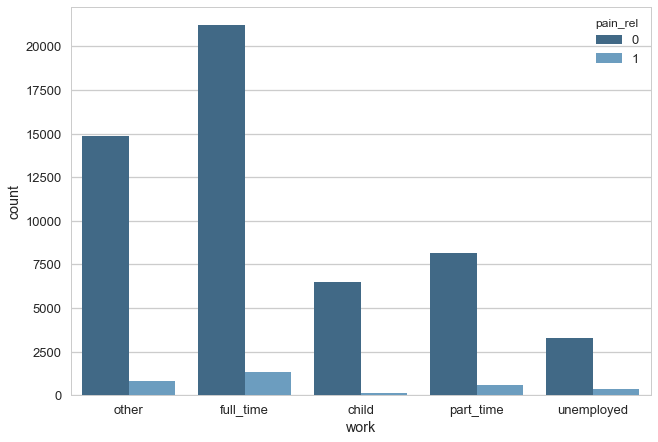

In [15]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
plt.rcParams["axes.labelsize"] = 20
sns.set_context("talk")
fig_work = sns.countplot(x="work", hue="pain_rel", data=df2015, palette="Blues_d");
fig = fig_work.get_figure()
fig.savefig('fig_work.png')

In [180]:
#CROSSTAB SEX
#Among men, 6% have misused pain killers in the last year.
#Among women, 5% have misued pain killers in the last year
(pd.crosstab(df2015.sex, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
sex,,
female,0.948800,0.051200
male,0.938098,0.061902


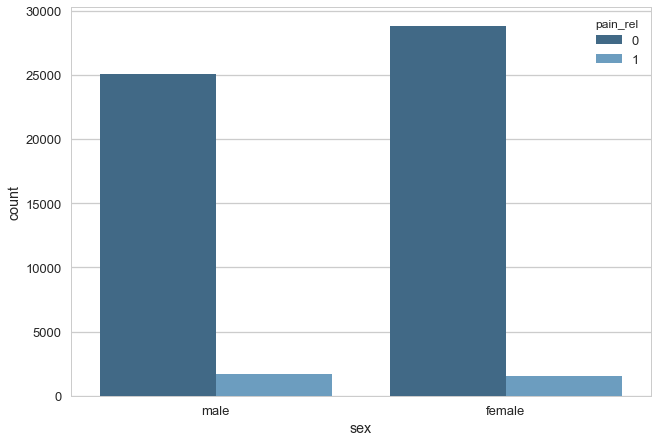

In [18]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
plt.rcParams["axes.labelsize"] = 20
sns.set_context("talk")
fig_sex = sns.countplot(x="sex", hue="pain_rel", data=df2015, palette="Blues_d");
fig = fig_sex.get_figure()
fig.savefig('fig_sex.png')

In [183]:
#Of those who used marijuana in the last year, 17% misused pain killers in the same time frame
(pd.crosstab(df2015.mrj, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
mrj,,
0,0.968537,0.031463
1,0.828617,0.171383


In [184]:
#Of those who used cocaine in the last year, 37% misused pain killers in the same time frame
(pd.crosstab(df2015.coc, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
coc,,
0,0.950980,0.049020
1,0.622702,0.377298


In [185]:
#Of those who used crack in the last year, 55% misused pain killers in the same time frame
(pd.crosstab(df2015.crk, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
crk,,
0,0.945135,0.054865
1,0.440789,0.559211


In [186]:
#Of those who used heroine in the last year, 75% misused pain killers in the same time frame
(pd.crosstab(df2015.her, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
her,,
0,0.946542,0.053458
1,0.242152,0.757848


In [187]:
#Of those who used tranquilizers in the last year, 52% misused pain killers in the same time frame
(pd.crosstab(df2015.tranq, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
tranq,,
0,0.957210,0.042790
1,0.476489,0.523511


In [188]:
#Of those who used stimulants in the last year, 37% misused pain killers in the same time frame
(pd.crosstab(df2015.stim, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
stim,,
0,0.953799,0.046201
1,0.624424,0.375576


In [189]:
#Of those who used sedatives in the last year, 52% misused pain killers in the same time frame
(pd.crosstab(df2015.sed, df2015.pain_rel)).apply(lambda r: r/r.sum(), axis=1)

pain_rel,0,1
sed,,
0,0.946574,0.053426
1,0.476331,0.523669


## <font color=blue>Model</font>
* **Outcome**: misuse of pain relievers in the past year
* **Predictor variables**: age, sex, income level, marital status, work status, use of other substances (crack, heroin, tranquilizers, stimulants, sedatives) in the last year

### Logistic Regression:
Performs well, however, given that this model aims to minimize the overall error rate, rather than paying attention to the positive cases, we need another model.

In [10]:
remove = ['tranq','mrj','coc','stim','oxy','pain_rel','illegal_drug’,’oxy','illegal_drug','demyr','hydmyr','methdyr','fentyr','oxyyr','tramyr','morphyr','fentyr','bupryr','oxymyr','demyr','hydmyr','methdyr']

In [11]:
dummies = ['age','race','marital','income','work','sex']

df2015 = pd.get_dummies(df2015, prefix = dummies, columns = dummies)

In [12]:
#Variable values with highest frequency will be the references
references = ['age_35_and_over','marital_never_married','work_full_time','income_75000>','sex_female']

In [19]:
#Create an X and a Y
feature_names = [x for x in df2015.columns if x not in remove and x not in references]
X = df2015[feature_names]
y = df2015.pain_rel

In [20]:
feature_names

['crk',
 'her',
 'sed',
 'age_12_13',
 'age_14_15',
 'age_16_17',
 'age_18_20',
 'age_21_25',
 'age_26_34',
 'race_>1race',
 'race_AfrAm',
 'race_Asian',
 'race_Hispanic',
 'race_NatAm',
 'race_NativeHI',
 'race_white',
 'marital_Divorced',
 'marital_child',
 'marital_married',
 'marital_widowed',
 'income_21-49000',
 'income_50-74000',
 'income_<20,000',
 'work_child',
 'work_other',
 'work_part_time',
 'work_unemployed',
 'sex_male']

In [21]:
#Split the data into training and testing sets
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(57146, 28)
(57146,)
(42859, 28)
(14287, 28)
(42859,)
(14287,)


### Logistic regression

In [142]:
#Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_names, logreg.coef_[0])

[('crk', 2.0990147247708184),
 ('her', 3.2233026765986237),
 ('sed', 2.9010138209656744),
 ('age_12_13', -0.48017297479632448),
 ('age_14_15', 0.0020118083946202734),
 ('age_16_17', 0.14763573873337441),
 ('age_18_20', 0.47838299016696978),
 ('age_21_25', 0.64862845922758339),
 ('age_26_34', 0.49667585484224536),
 ('race_>1race', -0.025985080219771188),
 ('race_AfrAm', -0.48629666203713712),
 ('race_Asian', -1.1156228925935976),
 ('race_Hispanic', -0.35233498621641546),
 ('race_NatAm', -0.14893822791039821),
 ('race_NativeHI', -0.58225230500607439),
 ('race_white', -0.20207692129800889),
 ('marital_Divorced', 0.049638484171977346),
 ('marital_child', -0.25667196696070749),
 ('marital_married', -0.44532272239927051),
 ('marital_widowed', 0.049025212932481056),
 ('income_21-49000', 0.14435037869361489),
 ('income_50-74000', -0.0019008685799821855),
 ('income_>20,000', 0.13668501637102817),
 ('work_child', -0.25667196696070749),
 ('work_other', -0.11272989486459224),
 ('work_part_time', 0

In [143]:
print(logreg.intercept_)

[-2.91350708]


In [144]:
# predict class labels for the test set
y_pred_class_log = logreg.predict(X_test)

# generate class probabilities
probs_log = logreg.predict_proba(X_test)

# generate evaluation metrics
print metrics.accuracy_score(y_test, y_pred_class_log)
print metrics.roc_auc_score(y_test, probs_log[:, 1])

0.946034856863
0.684871351336


Classification accuracy (percentage of correct predictions)is 68%

In [61]:
#Compare your testing accuracy to the null accuracy
#A model that always predicts 0 would be right 94% of the time
max(y_test.mean(), 1 - y_test.mean())

0.9444250017498426

In [62]:
# Confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[13450    43]
 [  728    66]]


In [63]:
#For this case:
    #positive is misuse of pain relievers
    #negative is non misuse of pain relievers
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]


print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

('True Positives:', 66)
('True Negatives:', 13450)
('False Positives:', 43)
('False Negatives:', 728)


In [64]:
#Accuracy: Overall, how often is the classifier correct?
#0.94: good. We want this number to be high
print(float(TP + TN))/ len(y_test)

0.946034856863


In [65]:
#Misclassification Rate: Overall, how often is it wrong?
#.05: good. We want this number to be low
print(float(FP + FN))/ len(y_test)

0.0539651431371


In [66]:
#Sensitivity: 
#When there is actual misuse of pain relievers, how often does the model predict it? 8% of the times
#Not good
print(TP / float(TP + FN))

0.0831234256927


In [67]:
# Specificity:
#When there was no misuse of pain relievers, how often does the model predict it? 99% of the times
print(TN / float(TN + FP))

0.99681316238


In [68]:
#Precision: When it predicts misuse, how often is it correct? 60% of the times
print(TP / float(FP + TP))

0.605504587156


In [69]:
#False Positive Rate: When it's actually non misuse, how often does it predict misuse? 0.3% of the time
print(FP / float(TN + FP))

0.00318683761951


### Random Forest: 

In [22]:
rf = RandomForestClassifier()

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [24]:
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.950
Accuracy: 0.945


In [25]:
tuned_parameters = [{'max_features': ['sqrt','log2','auto'], 'n_estimators': [100,150,200],
                      'min_samples_leaf': [1, 5],
                     'n_jobs': [-1], 'random_state': [142],
                     'criterion':['gini','entropy']}]

In [26]:
gs = GridSearchCV(estimator = rf, param_grid = tuned_parameters,
                  n_jobs=-1, verbose = True, cv=5)

In [27]:
gs.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 12.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_jobs': [-1], 'min_samples_leaf': [1, 5], 'n_estimators': [100, 150, 200], 'random_state': [142], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', 'auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [28]:
# Get best value to use
print "Best Params:"
print gs.best_params_

Best Params:
{'n_jobs': -1, 'min_samples_leaf': 5, 'n_estimators': 150, 'random_state': 142, 'criterion': 'entropy', 'max_features': 'sqrt'}


In [29]:
print gs.score(X_train,y_train)

0.946778972911


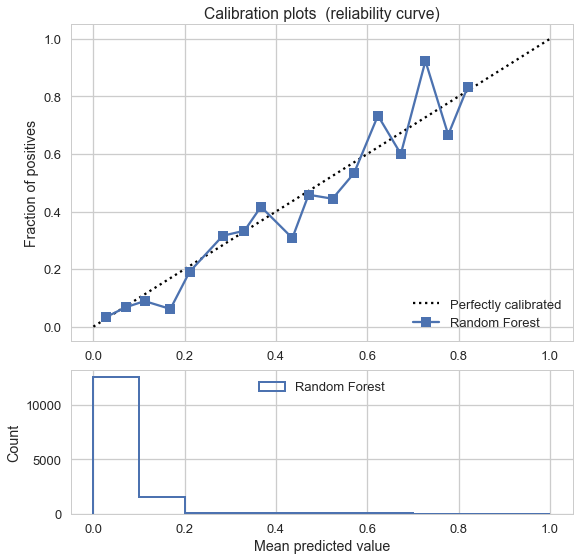

In [30]:
#Calibration plot (reliability curve) based on the best parameters
#Graph a classifier's scores against true probabilities. 
#The classifier is well calibrated if the scores correspond well with probability estimates

params = {'n_jobs': -1,
          'min_samples_leaf': 5,
          'n_estimators': 150,
          'random_state': 142,
          'criterion': 'entropy',
          'max_features': 'sqrt'}


rf = RandomForestClassifier(**params)
rf.fit(X_train,y_train)


plt.figure(figsize=(9, 9))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name in [(rf, 'Random Forest')]:
    # clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=20)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

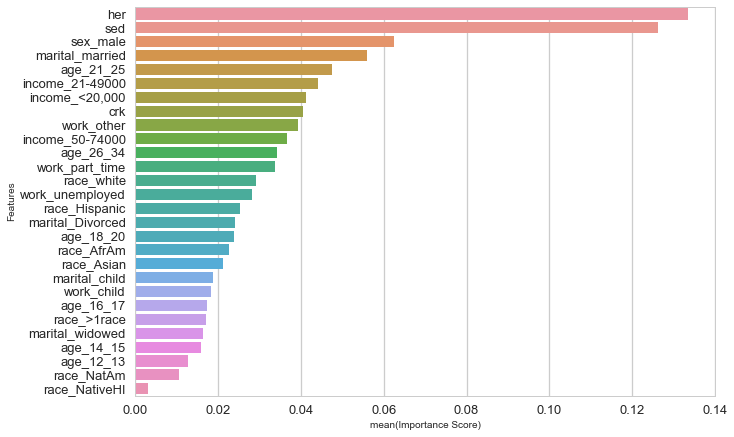

In [31]:
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)
sns.set_context("talk", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":10}) 
sns.barplot(y='Features', x='Importance Score', data=features_df, orient="h",)

In [32]:
def combine_dummies(dummy_prefixes):
    for p in dummy_prefixes:
        sub_keys = filter(lambda x: x.startswith(p), feature_dict)
        sub_keys_sum = sum([feature_dict[x] for x in sub_keys])
        for k in sub_keys: feature_dict.pop(k)
        feature_dict[p] = sub_keys_sum
    return feature_dict

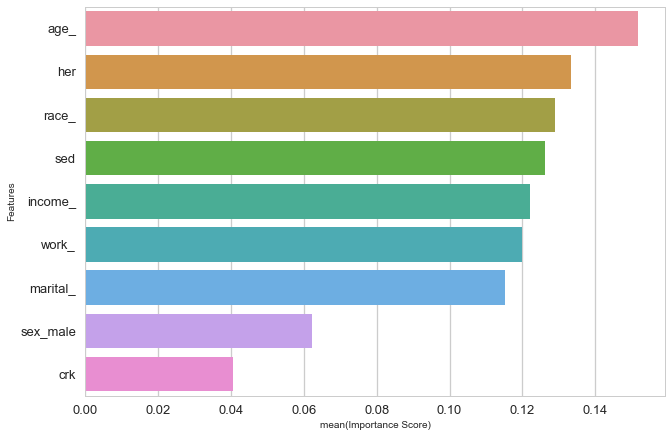

In [34]:
# Plot importances with dummy features combined
feature_names = X.columns
feature_importances = rf.feature_importances_
feature_dummy_prefixes = ['income_','work_','race_','marital_','age_']

feature_dict = dict(zip(feature_names, feature_importances))
feature_dict = combine_dummies(feature_dummy_prefixes)

features_df = pd.DataFrame(feature_dict.items(), columns=['Features', 'Importance Score'])
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

### How do both models compare:

In [155]:
# predict class labels for the test set
y_pred_class_log = logreg.predict(X_test)
y_pred_class_rf = rf.predict(X_test)
# generate class probabilities
probs_log = logreg.predict_proba(X_test)
probs_rf = rf.predict_proba(X_test)
# generate evaluation metrics
print metrics.accuracy_score(y_test, y_pred_class_log)
print metrics.roc_auc_score(y_test, probs_log[:, 1])
print metrics.accuracy_score(y_test, y_pred_class_rf)
print metrics.roc_auc_score(y_test, probs_rf[:, 1])

0.946034856863
0.684871351336
0.946174844264
0.669100136072


In [156]:
logreg_scores = cross_val_score(logreg, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

In [157]:
#Similar scores
print logreg_scores.mean()
print rf_scores.mean()

0.946365423639
0.94603295295


Logistic Regression classification accuracy is 68%.
Random Forest classification accuracy is 66%.

### What to do with our inbalanced dataset?
Most classification algorithms will only perform optimally when the number of samples of each class is roughly the same. Highly skewed datasets, where the minority is heavily outnumbered by one or more classes, have proven to be a challenge while at the same time becoming more and more common.

In [158]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [159]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[ 0.94653652,  0.05346348],
       [ 0.91704349,  0.08295651],
       [ 0.97237195,  0.02762805],
       [ 0.97456834,  0.02543166],
       [ 0.9768986 ,  0.0231014 ],
       [ 0.9386453 ,  0.0613547 ],
       [ 0.9812541 ,  0.0187459 ],
       [ 0.95537253,  0.04462747],
       [ 0.94736275,  0.05263725],
       [ 0.92939992,  0.07060008]])

In [160]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.05346348,  0.08295651,  0.02762805,  0.02543166,  0.0231014 ,
        0.0613547 ,  0.0187459 ,  0.04462747,  0.05263725,  0.07060008])

In [161]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

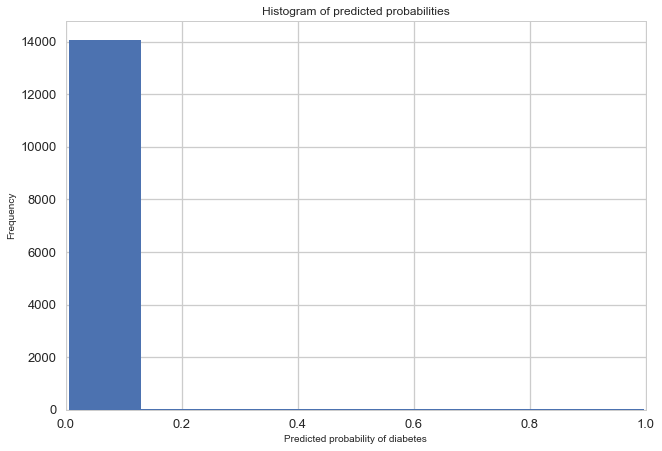

In [163]:
# histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12
# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Almost all of observations have probability from 0.0 to 0.1

In [164]:
# predict misuse of pain killers if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
y_pred_class = binarize(y_pred_prob, 0.3)[0]

/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [165]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.05346348,  0.08295651,  0.02762805,  0.02543166,  0.0231014 ,
        0.0613547 ,  0.0187459 ,  0.04462747,  0.05263725,  0.07060008])

In [166]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[13450    43]
 [  728    66]]


In [167]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[13413    80]
 [  708    86]]


In [169]:
# sensitivity has increased (used to be 0.8)
print (86 / float(86 + 708))

0.108312342569
